In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

# Sklearn
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
aids_country= pd.read_csv('Data/vih/homosexual aids.csv')
aids_country
aids_country.rename(columns={'Cumulative total**': 'total'}, inplace=True)
aids_country

,Country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,total,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Austria,34.0,37.0,28.0,31.0,32.0,32.0,27.0,22.0,25.0,19.0,1018.0,NaN,NaN,NaN
1,Belgium,25.0,25.0,22.0,34.0,31.0,29.0,22.0,20.0,NaN,NaN,1412.0,NaN,NaN,NaN
2,Bulgaria,4.0,4.0,4.0,4.0,5.0,2.0,8.0,12.0,9.0,12.0,88.0,NaN,NaN,NaN
3,Croatia,11.0,6.0,12.0,17.0,19.0,18.0,22.0,11.0,18.0,12.0,249.0,NaN,NaN,NaN
4,Cyprus,2.0,4.0,4.0,4.0,4.0,0.0,1.0,2.0,4.0,2.0,109.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Uzbekistan,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
57,West,1911.0,1889.0,1826.0,1765.0,1769.0,1614.0,1553.0,1416.0,1209.0,999.0,104412.0,NaN,NaN,NaN
58,Centre,88.0,91.0,125.0,138.0,147.0,156.0,171.0,186.0,211.0,177.0,2975.0,NaN,NaN,NaN
59,East,16.0,24.0,32.0,24.0,40.0,62.0,69.0,97.0,102.0,113.0,744.0,NaN,NaN,NaN


In [2]:
aids_country_homosexual= pd.read_csv('Data/vih/AIDS_diagnoses_men_infected_by_sex_between_men_by_country_and_year_of_diagnosis_2006 to 2015.csv')
aids_country_homosexual.rename(columns={'Cumulative total**': 'total'}, inplace=True)
aids_country_homosexual

,Area,Country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,total
0,West,Austria,34,37,28,31,32,32,27,22,25,19,1018
1,West,Belgium,25,25,22,34,31,29,22,20,0,0,1412
2,Centre,Bulgaria,4,4,4,4,5,2,8,12,9,12,88
3,Centre,Croatia,11,6,12,17,19,18,22,11,18,12,249
4,Centre,Cyprus,2,4,4,4,4,0,1,2,4,2,109
5,Centre,Czech Republic,3,8,7,10,9,13,12,14,9,16,222
6,West,Denmark,17,13,16,12,15,13,13,11,10,11,1727
7,East,Estonia,1,0,1,0,0,0,1,0,1,0,27
8,West,Finland,8,13,10,6,7,6,2,4,6,7,299
9,West,France,293,247,258,264,251,238,193,198,144,99,28115


In [3]:
aids_country_heterosexual= pd.read_csv('Data/vih/AIDS_diagnoses_heterosexual_contact_by country_and_year_of_diagnosis_2006 to 2015.csv')
aids_country_heterosexual

,Area,Country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Cumulative total**,Unnamed: 13
0,West,Austria,39.0,41.0,35.0,37.0,30.0,27.0,34.0,24.0,33.0,25.0,856.0,NaN
1,West,Belgium,63.0,66.0,75.0,73.0,64.0,49.0,65.0,43.0,NaN,NaN,2303.0,NaN
2,Centre,Bulgaria,12.0,16.0,15.0,19.0,14.0,20.0,15.0,20.0,25.0,22.0,304.0,NaN
3,Centre,Croatia,8.0,4.0,10.0,4.0,1.0,6.0,4.0,6.0,5.0,2.0,153.0,NaN
4,Centre,Cyprus,6.0,6.0,7.0,4.0,5.0,5.0,4.0,1.0,1.0,4.0,128.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,WHO European Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,West,West,3494.0,3248.0,3268.0,2878.0,2838.0,2465.0,2451.0,2066.0,1770.0,1428.0,87962.0,NaN
60,Centre,Centre,245.0,255.0,298.0,263.0,269.0,363.0,318.0,347.0,390.0,378.0,5647.0,NaN
61,East,East,1377.0,1710.0,1825.0,2227.0,3113.0,5057.0,5931.0,5921.0,6934.0,6532.0,42696.0,NaN


In [4]:
aids_test= pd.read_csv('Data/vih/number_of_HIV_tests_performed_by_country_and_year_2006 to 2015.csv')
aids_test

,Area,Country*,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Tests/1000 population,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,West,Austria,659693.0,777935.0,751749.0,770901.0,831675.0,826256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,West,Belgium,578717.0,595394.0,619418.0,635150.0,651095.0,679655.0,703486.0,695433.0,697684.0,692679.0,61.5,NaN,NaN,NaN
2,Centre,Bulgaria,105000.0,160000.0,110000.0,140000.0,160000.0,180000.0,190000.0,210000.0,230000.0,290000.0,40.3,NaN,NaN,NaN
3,Centre,Croatia,26124.0,32698.0,38996.0,40938.0,32848.0,32928.0,40071.0,29998.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Centre,Cyprus,37763.0,41913.0,42294.0,48158.0,48385.0,49074.0,54120.0,50235.0,NaN,NaN,NaN,NaN,NaN,NaN
5,Centre,Czech Republic,317823.0,344874.0,342223.0,347135.0,353507.0,334569.0,349205.0,341583.0,349448.0,345274.0,32.8,NaN,NaN,NaN
6,West,Denmark,154332.0,141880.0,124935.0,112533.0,168923.0,137877.0,134709.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,East,Estonia,65861.0,68478.0,74357.0,78735.0,78054.0,85025.0,73367.0,82279.0,82266.0,87587.0,66.7,NaN,NaN,NaN
8,West,Finland,147601.0,153478.0,186822.0,190380.0,185114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,West,France,5176147.0,5152287.0,5051896.0,5023831.0,5009124.0,5212211.0,5242116.0,5218847.0,5255258.0,5354396.0,80.6,NaN,NaN,NaN


In [5]:
aids_test= pd.read_csv('Data/vih/HIV_AIDS_deaths_by_geographic_area_country_and_year_of_death_2006 to 2015.csv')
aids_test

,Area,Country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Cumulative total***,Unnamed: 13
0,EU/EEA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,West,Austria,38.0,51.0,32.0,33.0,40.0,39.0,35.0,41.0,44.0,25.0,1511.0,NaN
2,West,Belgium,39.0,69.0,56.0,52.0,56.0,69.0,65.0,80.0,67.0,60.0,2032.0,NaN
3,Centre,Bulgaria,8.0,6.0,9.0,2.0,14.0,17.0,16.0,14.0,13.0,8.0,164.0,NaN
4,Centre,Croatia,6.0,2.0,7.0,7.0,10.0,6.0,9.0,8.0,5.0,16.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,WHO European Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,West,West,3271.0,3211.0,2790.0,2371.0,2208.0,2001.0,1819.0,1853.0,973.0,662.0,186951.0,NaN
62,Centre,Centre,310.0,285.0,290.0,244.0,288.0,391.0,339.0,344.0,375.0,324.0,8354.0,NaN
63,East,East,2894.0,3085.0,3492.0,3244.0,3847.0,4548.0,4593.0,4178.0,4070.0,3665.0,43507.0,NaN


In [6]:
aids_mother_to_child= pd.read_csv('Data/vih/AIDS_diagnoses_mother_to_child_transmission_by_country_year_of_diagnosis_2006 to 2015.csv')
aids_mother_to_child

,Area,Country*,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Cumulative total**,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,West,Austria,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,13,NaN,NaN,NaN
1,West,Belgium,1.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,122,NaN,NaN,NaN
2,Centre,Bulgaria,0.0,0.0,0.0,0.0,2.0,1.0,0.0,3.0,0.0,0.0,7,NaN,NaN,NaN
3,Centre,Croatia,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,NaN,NaN,NaN
4,Centre,Cyprus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,NaN,total Non EU-EEA,146.0,150.0,116.0,131.0,176.0,155.0,115.0,102.0,92.0,83.0,1712,NaN,NaN,NaN
57,West,West,62.0,66.0,65.0,57.0,38.0,31.0,29.0,37.0,13.0,9.0,3936,NaN,NaN,NaN
58,Centre,Centre,12.0,10.0,14.0,24.0,13.0,17.0,18.0,25.0,10.0,12.0,453,NaN,NaN,NaN
59,East,East,145.0,145.0,118.0,127.0,171.0,155.0,109.0,97.0,91.0,79.0,1525,NaN,NaN,NaN


In [7]:
aids_drug_injection= pd.read_csv('Data/vih/AIDS_diagnoses_injecting_drug_use_by_country_and_year_of_diagnosis_2006 to 2015.csv')
aids_drug_injection

,Area,Country*,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Cumulative total**,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,EU/EEA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,West,Austria,20.0,23.0,30.0,18.0,14.0,13.0,25.0,14.0,18.0,18.0,867.0,NaN,NaN,NaN,NaN,NaN,NaN
2,West,Belgium,7.0,3.0,8.0,5.0,3.0,4.0,1.0,2.0,NaN,NaN,282.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Centre,Bulgaria,0.0,1.0,4.0,7.0,10.0,17.0,39.0,29.0,26.0,11.0,146.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Centre,Croatia,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,*Country-specific comments are in Annex 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,** Cumulative total is the total number of cas...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,"*** Without prejudice to positions on status, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Source: European Centre for Disease Prevention...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
aids_country_homosexual_2006 = aids_country_homosexual['2006'].dropna()
aids_country_homosexual_2006

0       34
1       25
2        4
3       11
4        2
5        3
6       17
7        1
8        8
9      293
10     343
11      38
12      10
13       2
14       8
15     309
16       3
17       0
18       1
19       2
20       3
21     126
22      11
23      14
24      86
25      10
26       3
27       4
28     301
29       9
30     244
31    1925
32       0
33       0
34       0
35       0
36       0
37       0
38       2
39       3
40       9
41       0
42       0
43       0
44       0
45       3
46       0
47       0
48      18
49      18
50       0
51      43
52       0
53       4
54       0
55       8
56       1
57    1911
58      88
59      16
Name: 2006, dtype: int64

In [9]:
aids_country_homosexual_2007 = aids_country_homosexual['2007'].dropna()
aids_country_homosexual_2007

0       37
1       25
2        4
3        6
4        4
5        8
6       13
7        0
8       13
9      247
10     317
11      44
12      12
13       0
14       7
15     316
16       3
17       0
18       2
19       2
20       0
21     137
22       2
23      19
24      86
25       6
26       2
27       6
28     302
29      17
30     255
31    1892
32       2
33       1
34       1
35       2
36       0
37       0
38       2
39       3
40       5
41       1
42       1
43       2
44       0
45       2
46       0
47       0
48      13
49      12
50       1
51      63
52       0
53       5
54       0
55       9
56       0
57    1889
58      91
59      24
Name: 2007, dtype: int64

In [10]:
aids_country_homosexual_2008 = aids_country_homosexual['2008'].dropna()
aids_country_homosexual_2008

0       28
1       22
2        4
3       12
4        4
5        7
6       16
7        1
8       10
9      258
10     273
11      57
12      16
13       1
14       8
15     299
16       3
17       0
18       7
19       0
20       1
21     132
22       6
23      28
24     107
25       9
26       0
27       7
28     324
29       0
30     229
31    1869
32       6
33       1
34       3
35       1
36       0
37       0
38       2
39       7
40       5
41       0
42       0
43       0
44       0
45       2
46       0
47       0
48      17
49      15
50       2
51      49
52       0
53      11
54       0
55      10
56       0
57    1826
58     125
59      32
Name: 2008, dtype: int64

In [11]:
aids_country_homosexual_2009 = aids_country_homosexual['2009'].dropna()
aids_country_homosexual_2009

0       31
1       34
2        4
3       17
4        4
5       10
6       12
7        0
8        6
9      264
10     280
11      49
12      13
13       0
14      10
15     293
16       7
17       0
18       1
19       1
20       0
21     136
22       7
23      25
24      83
25      15
26       1
27      10
28     315
29       0
30     191
31    1819
32       6
33       0
34       0
35       1
36       0
37       0
38       1
39       3
40       8
41       0
42       0
43       2
44       0
45       4
46       0
47       0
48      26
49      25
50       1
51      45
52       0
53       2
54       0
55      10
56       0
57    1765
58     138
59      24
Name: 2009, dtype: int64

In [12]:
aids_country_homosexual_2010 = aids_country_homosexual['2010'].dropna()
aids_country_homosexual_2010

0       32
1       31
2        5
3       19
4        4
5        9
6       15
7        0
8        7
9      251
10     253
11      63
12      23
13       0
14      13
15     252
16      10
17       0
18       0
19       2
20       0
21     129
22       9
23      29
24      84
25      13
26       1
27       7
28     358
29       0
30     202
31    1822
32       1
33       0
34       1
35       4
36       2
37       5
38       1
39      10
40       6
41       1
42       0
43       2
44       0
45       5
46       0
47       0
48      22
49      22
50       0
51      61
52       0
53       3
54       0
55      10
56       0
57    1769
58     147
59      40
Name: 2010, dtype: int64

In [13]:
aids_country_homosexual_2011 = aids_country_homosexual['2011'].dropna()
aids_country_homosexual_2011

0       32
1       29
2        2
3       18
4        0
5       13
6       13
7        0
8        6
9      238
10     216
11      54
12      24
13       0
14      17
15     265
16       7
17       0
18       1
19       6
20       1
21     116
22       9
23      42
24      88
25      13
26       3
27       7
28     333
29       0
30     146
31    1699
32       5
33       1
34       2
35       1
36       6
37       2
38       4
39      11
40       8
41       1
42       0
43       2
44       0
45       1
46       0
47       1
48      22
49      21
50       1
51      35
52       0
53       0
54       0
55      31
56       0
57    1614
58     156
59      62
Name: 2011, dtype: int64

In [14]:
aids_country_homosexual_2012 = aids_country_homosexual['2012'].dropna()
aids_country_homosexual_2012

0       27
1       22
2        8
3       22
4        1
5       12
6       13
7        1
8        2
9      193
10     215
11      50
12      37
13       0
14      15
15     261
16       4
17       0
18       2
19       3
20       0
21     124
22      10
23      25
24      87
25       7
26       3
27       8
28     334
29       0
30     158
31    1644
32       6
33       0
34       2
35       1
36       3
37       4
38       3
39      11
40       4
41       0
42       0
43       0
44       0
45       4
46       0
47       2
48      31
49      30
50       1
51      33
52       0
53       0
54       0
55      45
56       0
57    1553
58     171
59      69
Name: 2012, dtype: int64

In [15]:
aids_country_homosexual_2013 = aids_country_homosexual['2013'].dropna()
aids_country_homosexual_2013

0       22
1       20
2       12
3       11
4        2
5       14
6       11
7        0
8        4
9      198
10     192
11      48
12      30
13       0
14       6
15     302
16      10
17       0
18       5
19       7
20       1
21     118
22      15
23      46
24      59
25      15
26       2
27       7
28     257
29       0
30     115
31    1529
32       6
33       1
34       5
35       3
36       3
37       3
38       3
39      16
40       8
41       4
42       0
43       0
44       0
45       3
46       0
47       0
48      20
49      19
50       1
51      32
52       1
53      12
54       0
55      50
56       0
57    1416
58     186
59      97
Name: 2013, dtype: int64

In [16]:
aids_country_homosexual_2014 = aids_country_homosexual['2014'].dropna()
aids_country_homosexual_2014

0       25
1        0
2        9
3       18
4        4
5        9
6       10
7        1
8        6
9      144
10     155
11      38
12      37
13       0
14      18
15     261
16       7
17       1
18       3
19       3
20       1
21      95
22      18
23      40
24      50
25      24
26       2
27      10
28     223
29       0
30     128
31    1340
32       8
33       1
34       7
35       1
36       4
37       0
38       5
39      21
40      11
41       0
42       0
43       2
44       1
45       3
46       0
47       0
48      27
49      27
50       0
51      21
52       1
53      15
54       0
55      55
56       0
57    1209
58     211
59     102
Name: 2014, dtype: int64

In [17]:
aids_country_homosexual_2015 = aids_country_homosexual['2015'].dropna()
aids_country_homosexual_2015
aids_country_heterosexual_2006 = aids_country_heterosexual['2006'].dropna()
aids_country_heterosexual_2006
aids_country_heterosexual_2007 = aids_country_heterosexual['2007'].dropna()
aids_country_heterosexual_2007
aids_country_heterosexual_2008 = aids_country_heterosexual['2008'].dropna()
aids_country_heterosexual_2008
aids_country_heterosexual_2009 = aids_country_heterosexual['2009'].dropna()
aids_country_heterosexual_2009
aids_country_heterosexual_2010 = aids_country_heterosexual['2010'].dropna()
aids_country_heterosexual_2010
aids_country_heterosexual_2011 = aids_country_heterosexual['2011'].dropna()
aids_country_heterosexual_2011
aids_country_heterosexual_2012 = aids_country_heterosexual['2012'].dropna()
aids_country_heterosexual_2012
aids_country_heterosexual_2013 = aids_country_heterosexual['2013'].dropna()
aids_country_heterosexual_2013
aids_country_heterosexual_2014 = aids_country_heterosexual['2014'].dropna()
aids_country_heterosexual_2014
aids_country_heterosexual_2015 = aids_country_heterosexual['2015'].dropna()
aids_country_heterosexual_2015

0       25.0
2       22.0
3        2.0
4        4.0
5       14.0
6       27.0
7       15.0
8        5.0
9      214.0
10      44.0
11      28.0
12       7.0
13       0.0
14      13.0
15     383.0
16      58.0
17       0.0
18      15.0
19       3.0
20       1.0
21      64.0
22      17.0
23      22.0
24     146.0
25     196.0
26       3.0
27       0.0
28     171.0
30     235.0
31    1734.0
32      52.0
33       2.0
34     128.0
35      93.0
36     333.0
38       4.0
39     144.0
40      24.0
41      97.0
42      40.0
43     222.0
44       0.0
45       1.0
47       0.0
48      12.0
49      11.0
50       1.0
51      26.0
52     137.0
53      39.0
55    5250.0
57    6604.0
59    1428.0
60     378.0
61    6532.0
62    8338.0
Name: 2015, dtype: float64

In [18]:
aids_country_homosexual_cumulative_total = aids_country_homosexual['total'].dropna()
aids_country_homosexual_cumulative_total
aids_country_heterosexual_cumulative_total = aids_country_heterosexual['Cumulative total**'].dropna()
aids_country_heterosexual_cumulative_total

aids_mother_to_child_cumulative_total = aids_mother_to_child['Cumulative total**'].dropna()
aids_mother_to_child_cumulative_total

aids_drug_injection_total = aids_drug_injection['Cumulative total**'].dropna()
aids_drug_injection_total

1        867.0
2        282.0
3        146.0
4         26.0
5          3.0
        ...   
59     55199.0
61    120247.0
62      2892.0
63     52213.0
64    175352.0
Name: Cumulative total**, Length: 62, dtype: float64

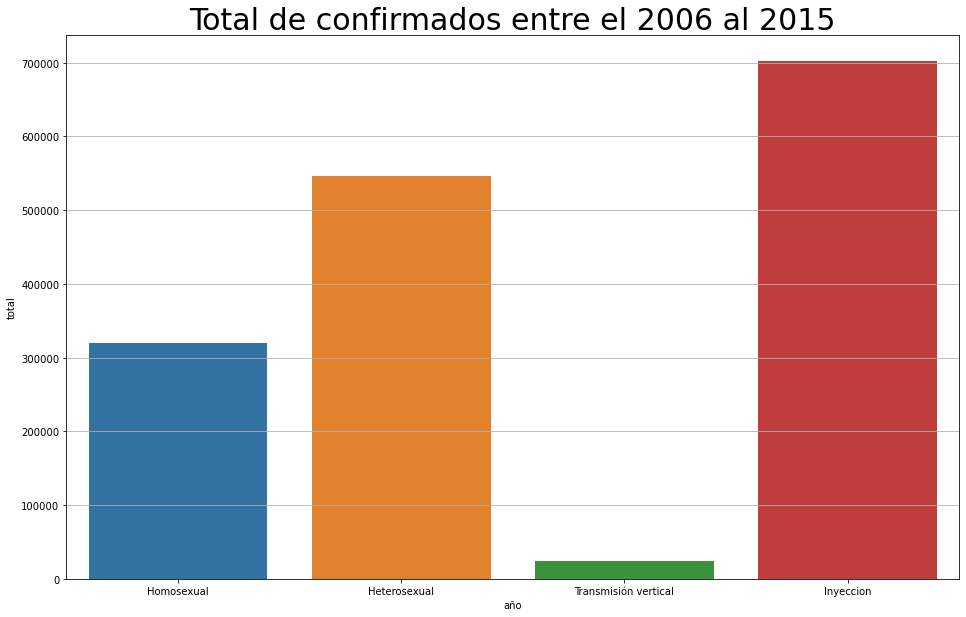

b'iVBORw0KGgoAAAANSUhEUgAABIAAAALQCAYAAADo9guXAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzdeXhN1+L/8U8IMZMghJDQBFWzhNs2bRApqdZQKaqIqVqK/rTf3s6mDriddFCXVgnXbbRKtLcV1FRXVQw1tjSIIakaI1FDSOzfH3myvydypkQi7O/79Tx5npOz1157nXP22eecz15rbQ/DMAwBAAAAAADAskqVdAMAAAAAAABQvAiAAAAAAAAALI4ACAAAAAAAwOIIgAAAAAAAACyOAAgAAAAAAMDiCIAAAAAAAAAsjgAIAAAAAADA4giAAAAAAAAALI4ACAAAAAAAwOIIgAAAAAAAACyOAAgAAAAAAMDiCIAAAAAAAAAsjgAIAAAAAADA4giAAAAAAAAALI4ACAAAAAAAwOIIgAAAAAAAACyOAAgAAAAAAMDiCIAAAAAAAAAsjgAIAAAAAADA4giAAAAAAAAALI4ACAAAAAAAwOIIgAAAAAAAACyOAAgAAAAAAMDiCIAAAAAAAAAsjgAIAAAAAADA4giAAAAAAAAALI4ACAAAAAAAwOIIgAAAAAAAACyOAAgAAAAAAMDiCIAAAAAAAAAsjgAIAAAAAADA4giAAAAAAAAALI4ACAAAAAAAwOIIgAAAAAAAACyOAAgAAAAAAMDiCIAAAAAAAAAsjgAIAAAAAADA4giAAAAAAAAALI4ACAAAAAAAwOIIgAAAAAAAACyOAAgAAAAAAMDiCIAAAAAAAAAsjgAIAAAAAADA4giAAAAAAAAALI4ACAAAAAAAwOIIgAAAAAAAACyOAAgAAAAAAMDiCIAAAAAAAAAsjgAIAAAAAADA4giAAAAAAAAALI4ACAAAAA

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df1=pd.DataFrame({'año': 'Homosexual','total': aids_country_homosexual_cumulative_total.sum()}, index=[0])
df2=pd.DataFrame({'año': 'Heterosexual','total': aids_country_heterosexual_cumulative_total.sum()}, index=[0])
df3=pd.DataFrame({'año': 'Transmisión vertical','total': aids_mother_to_child_cumulative_total.sum()}, index=[0])
df4=pd.DataFrame({'año': 'Inyeccion','total': aids_drug_injection_total.sum()}, index=[0])
plt.figure(figsize=(16, 10))
plt.xticks(size=10)
plt.yticks(size=10)
plt.grid(True)
#df1['hue']=1
#df2['hue']=2
res=pd.concat([df1,df2, df3, df4])
sns.barplot(x='año',y='total',data=res)
plt.title('Total de confirmados entre el 2006 al 2015', size=30)
plt.savefig('comparacion-contagios-vih.png')
plt.show()

import base64

with open("comparacion-contagios-vih.png", "rb") as image_file:
    encoded_string1 = base64.b64encode(image_file.read())

print(encoded_string1)


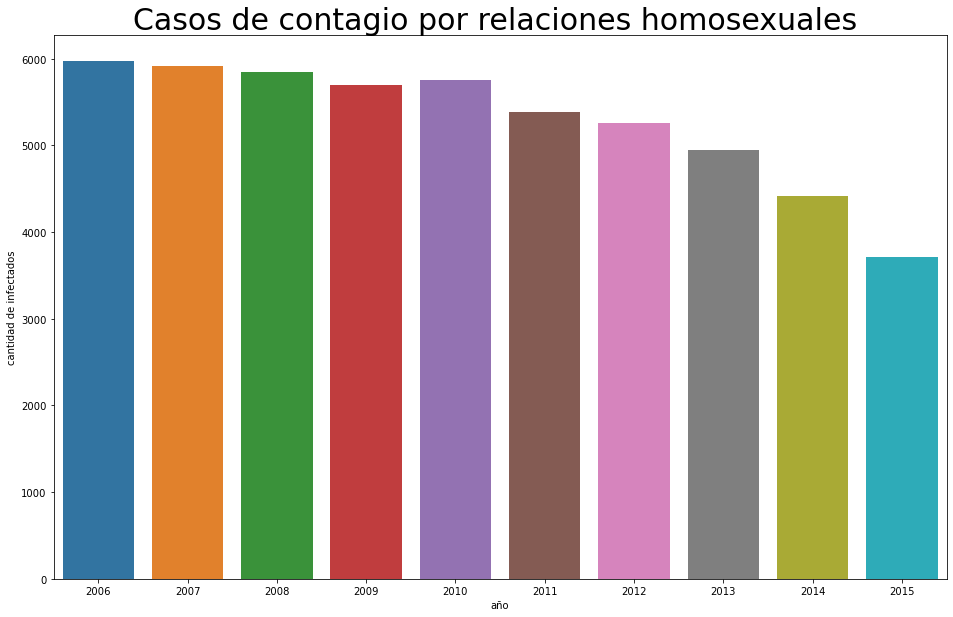

b'iVBORw0KGgoAAAANSUhEUgAABIAAAALQCAYAAADo9guXAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzdeVhV1eL/8Q+CoCIKooSK85QDlqaWQ+GE5ZBlmmOJaVlamjft3vpaaXXNRrNbZtchhwZTK/M2kV6HayKmOA9dJXNAnAUVFUFg/f7gx35AzoRA2L7v1/P4PHj22muvs6dzzmevvbaXMcYIAAAAAAAAtlWqpBsAAAAAAACA4kUABAAAAAAAYHMEQAAAAAAAADZHAAQAAAAAAGBzBEAAAAAAAAA2RwAEAAAAAABgcwRAAAAAAAAANkcABAAAAAAAYHMEQAAAAAAAADZHAAQAAAAAAGBzBEAAAAAAAAA2RwAEAAAAAABgcwRAAAAAAAAANkcABAAAAAAAYHMEQAAAAAAAADZHAAQAAAAAAGBzBEAAAAAAAAA2RwAEAAAAAABgcwRAAAAAAAAANkcABAAAAAAAYHMEQAAAAAAAADZHAAQAAAAAAGBzBEAAAAAAAAA2RwAEAAAAAABgcwRAAAAAAAAANkcABAAAAAAAYHMEQAAAAAAAADZHAAQAAAAAAGBzBEAAAAAAAAA2RwAEAAAAAABgcwRAAAAAAAAANkcABAAAAAAAYHMEQAAAAAAAADZHAAQAAAAAAGBzBEAAAAAAAAA2RwAEAAAAAABgcwRAAAAAAAAANkcABAAAAAAAYHMEQAAAAAAAADZHAAQAAAAAAGBzBEAAAAAAAAA2RwAEAAAAAABgcwRAAAAAAAAANkcABAAAAAAAYHMEQAAAAAAAADZHAAQAAAAAAGBzBEAAAAAAAAA2RwAEAAAAAABgcwRAAAAAAAAANkcABAAAAAAAYHMEQAAAAAAAAD

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
plt.title('Casos de contagio por relaciones homosexuales ', size=30)
df1=pd.DataFrame({'año': '2006','cantidad de infectados': aids_country_homosexual_2006.sum()}, index=[0])
df2=pd.DataFrame({'año': '2007','cantidad de infectados': aids_country_homosexual_2007.sum()}, index=[0])
df3=pd.DataFrame({'año': '2008','cantidad de infectados': aids_country_homosexual_2008.sum()}, index=[0])
df4=pd.DataFrame({'año': '2009','cantidad de infectados': aids_country_homosexual_2009.sum()}, index=[0])
df5=pd.DataFrame({'año': '2010','cantidad de infectados': aids_country_homosexual_2010.sum()}, index=[0])
df6=pd.DataFrame({'año': '2011','cantidad de infectados': aids_country_homosexual_2011.sum()}, index=[0])
df7=pd.DataFrame({'año': '2012','cantidad de infectados': aids_country_homosexual_2012.sum()}, index=[0])
df8=pd.DataFrame({'año': '2013','cantidad de infectados': aids_country_homosexual_2013.sum()}, index=[0])
df9=pd.DataFrame({'año': '2014','cantidad de infectados': aids_country_homosexual_2014.sum()}, index=[0])
df10=pd.DataFrame({'año': '2015','cantidad de infectados': aids_country_homosexual_2015.sum()}, index=[0])
#df1['hue']=1
#df2['hue']=2
res=pd.concat([df1,df2, df3, df4, df5, df6, df7, df8, df9, df10])
sns.barplot(x='año',y='cantidad de infectados',data=res)
plt.savefig('comparacion-contagios-gays-vih.png')
plt.show()

import base64

with open("comparacion-contagios-gays-vih.png", "rb") as image_file:
    encoded_string1 = base64.b64encode(image_file.read())

print(encoded_string1)

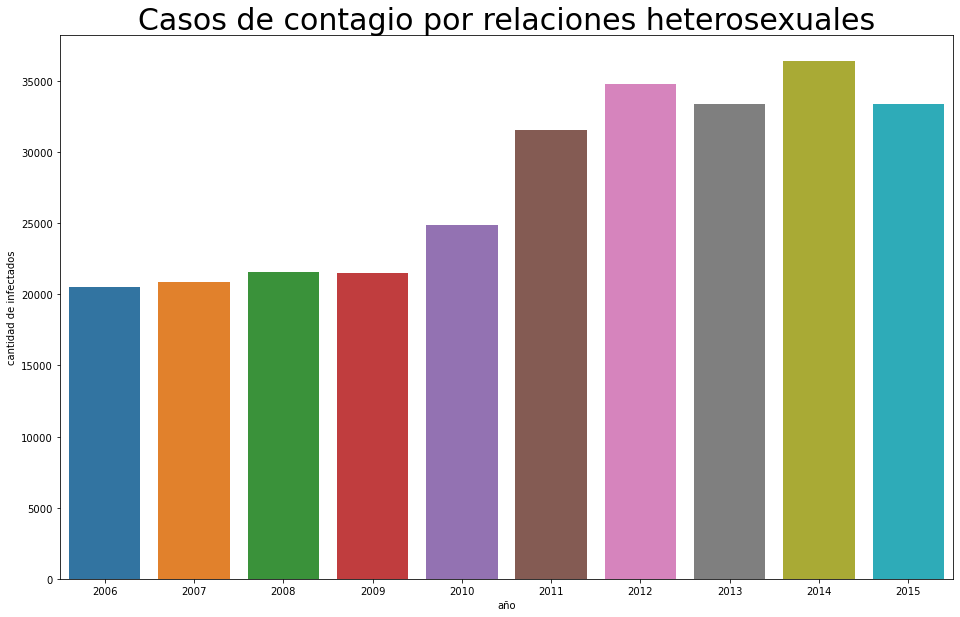

b'iVBORw0KGgoAAAANSUhEUgAABIAAAALQCAYAAADo9guXAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzdd3QV1eL+/yckJLSQAsTQpIvSQQQpUgJBqRaQDkEQFBREwat+uArqRWwgXkGUIsVCsQDWCFJEmtRQvRKRQAi9BwghZf/+yDfzSzktJDEyvl9rsVY4s2fPnn7OM3tmvIwxRgAAAAAAALCtQgXdAAAAAAAAAOQvAiAAAAAAAACbIwACAAAAAACwOQIgAAAAAAAAmyMAAgAAAAAAsDkCIAAAAAAAAJsjAAIAAAAAALA5AiAAAAAAAACbIwACAAAAAACwOQIgAAAAAAAAmyMAAgAAAAAAsDkCIAAAAAAAAJsjAAIAAAAAALA5AiAAAAAAAACbIwACAAAAAACwOQIgAAAAAAAAmyMAAgAAAAAAsDkCIAAAAAAAAJsjAAIAAAAAALA5AiAAAAAAAACbIwACAAAAAACwOQIgAAAAAAAAmyMAAgAAAAAAsDkCIAAAAAAAAJsjAAIAAAAAALA5AiAAAAAAAACbIwACAAAAAACwOQIgAAAAAAAAmyMAAgAAAAAAsDkCIAAAAAAAAJsjAAIAAAAAALA5AiAAAAAAAACbIwACAAAAAACwOQIgAAAAAAAAmyMAAgAAAAAAsDkCIAAAAAAAAJsjAAIAAAAAALA5AiAAAAAAAACbIwACAAAAAACwOQIgAAAAAAAAmyMAAgAAAAAAsDkCIAAAAAAAAJsjAAIAAAAAALA5AiAAAAAAAACbIwACAAAAAACwOQIgAAAAAAAAmyMAAgAAAAAAsDkCIAAAAAAAAJsjAAIAAAAAALA5AiAAAAAAAACbIwACAAAAAACwOQIgAAAAAA

In [21]:
plt.figure(figsize=(16, 10))
plt.title('Casos de contagio por relaciones heterosexuales', size=30)
df1=pd.DataFrame({'año': '2006','cantidad de infectados': aids_country_heterosexual_2006.sum()}, index=[0])
df2=pd.DataFrame({'año': '2007','cantidad de infectados': aids_country_heterosexual_2007.sum()}, index=[0])
df3=pd.DataFrame({'año': '2008','cantidad de infectados': aids_country_heterosexual_2008.sum()}, index=[0])
df4=pd.DataFrame({'año': '2009','cantidad de infectados': aids_country_heterosexual_2009.sum()}, index=[0])
df5=pd.DataFrame({'año': '2010','cantidad de infectados': aids_country_heterosexual_2010.sum()}, index=[0])
df6=pd.DataFrame({'año': '2011','cantidad de infectados': aids_country_heterosexual_2011.sum()}, index=[0])
df7=pd.DataFrame({'año': '2012','cantidad de infectados': aids_country_heterosexual_2012.sum()}, index=[0])
df8=pd.DataFrame({'año': '2013','cantidad de infectados': aids_country_heterosexual_2013.sum()}, index=[0])
df9=pd.DataFrame({'año': '2014','cantidad de infectados': aids_country_heterosexual_2014.sum()}, index=[0])
df10=pd.DataFrame({'año': '2015','cantidad de infectados': aids_country_heterosexual_2015.sum()}, index=[0])
#df1['hue']=1
#df2['hue']=2
res=pd.concat([df1,df2, df3, df4, df5, df6, df7, df8, df9, df10])
sns.barplot(x='año',y='cantidad de infectados',data=res)
plt.savefig('comparacion-contagios-hetero-vih.png')
plt.show()

import base64

with open("comparacion-contagios-hetero-vih.png", "rb") as image_file:
    encoded_string1 = base64.b64encode(image_file.read())

print(encoded_string1)

In [22]:
aids_drug_injection_2006 = aids_drug_injection['2006'].dropna()
aids_drug_injection_2006
aids_drug_injection_2007 = aids_drug_injection['2007'].dropna()
aids_drug_injection_2007
aids_drug_injection_2008 = aids_drug_injection['2008'].dropna()
aids_drug_injection_2008
aids_drug_injection_2009 = aids_drug_injection['2009'].dropna()
aids_drug_injection_2009
aids_drug_injection_2010 = aids_drug_injection['2010'].dropna()
aids_drug_injection_2010
aids_drug_injection_2011 = aids_drug_injection['2011'].dropna()
aids_drug_injection_2011
aids_drug_injection_2012 = aids_drug_injection['2012'].dropna()
aids_drug_injection_2012
aids_drug_injection_2013 = aids_drug_injection['2013'].dropna()
aids_drug_injection_2013
aids_drug_injection_2014 = aids_drug_injection['2014'].dropna()
aids_drug_injection_2014
aids_drug_injection_2015 = aids_drug_injection['2015'].dropna()
aids_drug_injection_2015

1       18.0
3       11.0
4        1.0
5        0.0
6        3.0
7        0.0
8        4.0
9        0.0
10      20.0
11       8.0
12      28.0
13       2.0
14       0.0
15       0.0
16      81.0
17      51.0
18       0.0
19      15.0
20       1.0
21       0.0
22       4.0
23       0.0
24      28.0
25      33.0
26      93.0
27       0.0
28       0.0
29      68.0
31      10.0
32     479.0
34       0.0
35       0.0
36      22.0
37      90.0
38     139.0
40       0.0
41      99.0
42       7.0
43     150.0
44      73.0
45      22.0
46       0.0
47       0.0
49       0.0
50       5.0
51       5.0
53       2.0
54      62.0
55       0.0
57    3050.0
59    3721.0
61     280.0
62     143.0
63    3777.0
64    4200.0
Name: 2015, dtype: float64

In [23]:
aids_mother_to_child_2006 = aids_mother_to_child['2006'].dropna()
aids_mother_to_child_2006
aids_mother_to_child_2007 = aids_mother_to_child['2007'].dropna()
aids_mother_to_child_2007
aids_mother_to_child_2008 = aids_mother_to_child['2008'].dropna()
aids_mother_to_child_2008
aids_mother_to_child_2009 = aids_mother_to_child['2009'].dropna()
aids_mother_to_child_2009
aids_mother_to_child_2010 = aids_mother_to_child['2010'].dropna()
aids_mother_to_child_2010
aids_mother_to_child_2011 = aids_mother_to_child['2011'].dropna()
aids_mother_to_child_2011
aids_mother_to_child_2012 = aids_mother_to_child['2012'].dropna()
aids_mother_to_child_2012
aids_mother_to_child_2013 = aids_mother_to_child['2013'].dropna()
aids_mother_to_child_2013
aids_mother_to_child_2014 = aids_mother_to_child['2014'].dropna()
aids_mother_to_child_2014
aids_mother_to_child_2015 = aids_mother_to_child['2015'].dropna()
aids_mother_to_child_2015

0       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       2.0
10      0.0
11      0.0
12      1.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      2.0
21      0.0
22      1.0
23      0.0
24      6.0
25      0.0
26      0.0
27      0.0
29      5.0
30     17.0
31      0.0
32      0.0
33      2.0
34      0.0
35     10.0
37      0.0
38      0.0
39      0.0
40      5.0
41      5.0
42      3.0
43      0.0
44      0.0
46      0.0
47      1.0
48      0.0
49      1.0
50      0.0
51      6.0
52      3.0
54     48.0
56     83.0
57      9.0
58     12.0
59     79.0
60    100.0
Name: 2015, dtype: float64

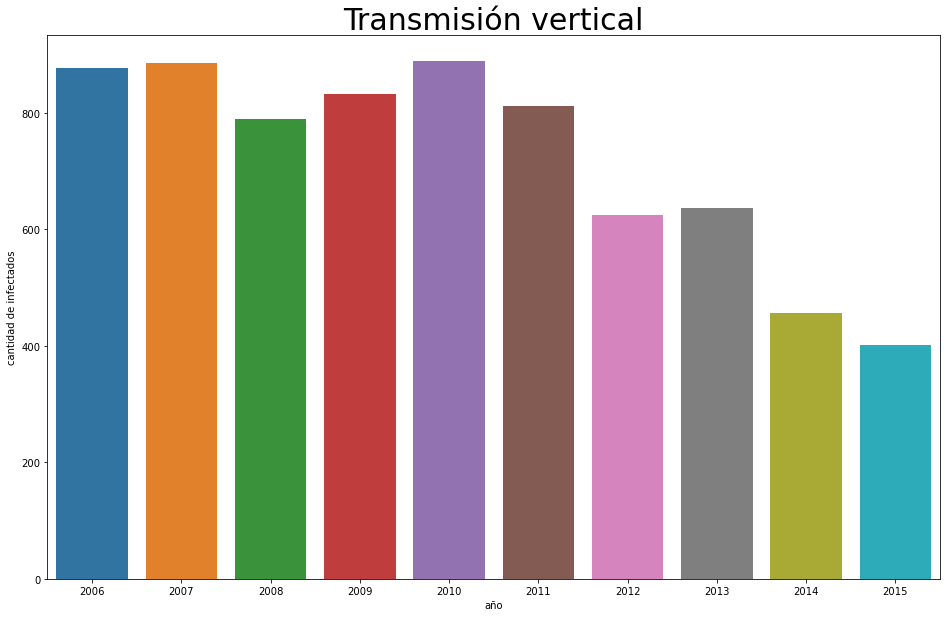

In [24]:
plt.figure(figsize=(16, 10))
plt.title('Transmisión vertical', size=30)
df1=pd.DataFrame({'año': '2006','cantidad de infectados': aids_mother_to_child_2006.sum()}, index=[0])
df2=pd.DataFrame({'año': '2007','cantidad de infectados': aids_mother_to_child_2007.sum()}, index=[0])
df3=pd.DataFrame({'año': '2008','cantidad de infectados': aids_mother_to_child_2008.sum()}, index=[0])
df4=pd.DataFrame({'año': '2009','cantidad de infectados': aids_mother_to_child_2009.sum()}, index=[0])
df5=pd.DataFrame({'año': '2010','cantidad de infectados': aids_mother_to_child_2010.sum()}, index=[0])
df6=pd.DataFrame({'año': '2011','cantidad de infectados': aids_mother_to_child_2011.sum()}, index=[0])
df7=pd.DataFrame({'año': '2012','cantidad de infectados': aids_mother_to_child_2012.sum()}, index=[0])
df8=pd.DataFrame({'año': '2013','cantidad de infectados': aids_mother_to_child_2013.sum()}, index=[0])
df9=pd.DataFrame({'año': '2014','cantidad de infectados': aids_mother_to_child_2014.sum()}, index=[0])
df10=pd.DataFrame({'año': '2015','cantidad de infectados': aids_mother_to_child_2015.sum()}, index=[0])
#df1['hue']=1
#df2['hue']=2
res=pd.concat([df1,df2, df3, df4, df5, df6, df7, df8, df9, df10])
sns.barplot(x='año',y='cantidad de infectados',data=res)
plt.show()

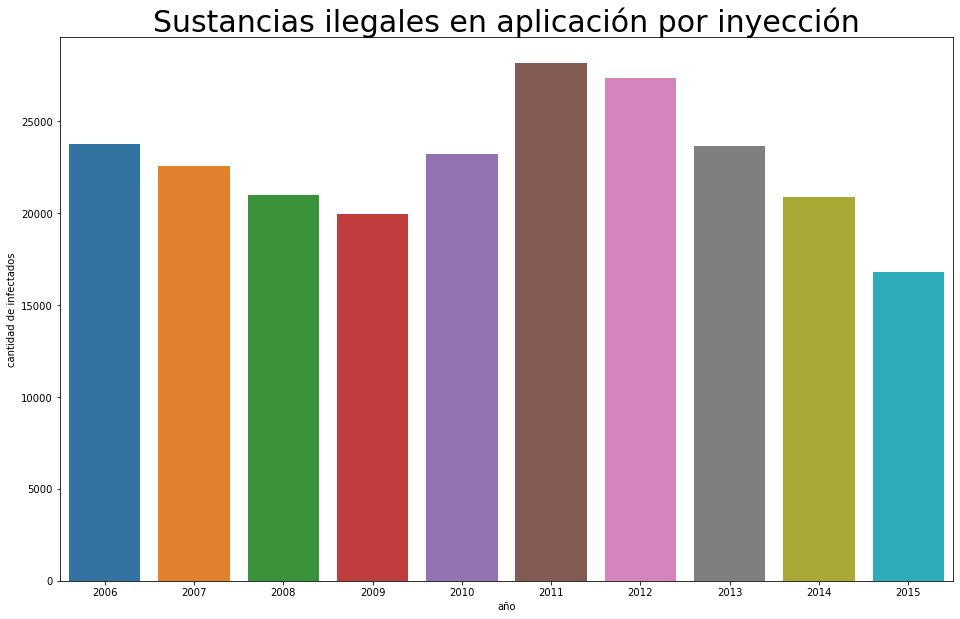

In [25]:
plt.figure(figsize=(16, 10))
plt.title('Sustancias ilegales en aplicación por inyección', size=30)
df1=pd.DataFrame({'año': '2006','cantidad de infectados': aids_drug_injection_2006.sum()}, index=[0])
df2=pd.DataFrame({'año': '2007','cantidad de infectados': aids_drug_injection_2007.sum()}, index=[0])
df3=pd.DataFrame({'año': '2008','cantidad de infectados': aids_drug_injection_2008.sum()}, index=[0])
df4=pd.DataFrame({'año': '2009','cantidad de infectados': aids_drug_injection_2009.sum()}, index=[0])
df5=pd.DataFrame({'año': '2010','cantidad de infectados': aids_drug_injection_2010.sum()}, index=[0])
df6=pd.DataFrame({'año': '2011','cantidad de infectados': aids_drug_injection_2011.sum()}, index=[0])
df7=pd.DataFrame({'año': '2012','cantidad de infectados': aids_drug_injection_2012.sum()}, index=[0])
df8=pd.DataFrame({'año': '2013','cantidad de infectados': aids_drug_injection_2013.sum()}, index=[0])
df9=pd.DataFrame({'año': '2014','cantidad de infectados': aids_drug_injection_2014.sum()}, index=[0])
df10=pd.DataFrame({'año': '2015','cantidad de infectados': aids_drug_injection_2015.sum()}, index=[0])
#df1['hue']=1
#df2['hue']=2
res=pd.concat([df1,df2, df3, df4, df5, df6, df7, df8, df9, df10])
sns.barplot(x='año',y='cantidad de infectados',data=res)
plt.show()

In [26]:
aids_country_age= pd.read_csv('Data/vih/new_HIV_diagnoses_by_sex_age_year_of_diagnosis_2006 to 2015.csv')
aids_country_age

,Unnamed: 0,2006 Female,2006 Male,2006 Total**,2007 Female,2007 Male,2007 Total**,2008 Female,2008 Male,2008 Total**,...,2014 Female,2014 Male,2014 Total**,2015 Female,2015 Male,2015 Total**,Cumulative Female,Cumulative Male,Cumulative Unknown,Cumulative Total
0,EU/EEA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,<15,168.0,149.0,317.0,172.0,134.0,309.0,143.0,149.0,292.0,...,104.0,89.0,195.0,108.0,97.0,206.0,7611.0,9383.0,80.0,17074.0
2,15-19,354.0,272.0,626.0,330.0,272.0,603.0,295.0,292.0,590.0,...,186.0,316.0,503.0,182.0,266.0,448.0,6398.0,7594.0,35.0,14027.0
3,20-24,900.0,1165.0,2070.0,913.0,1384.0,2306.0,838.0,1418.0,2271.0,...,518.0,1714.0,2235.0,440.0,1651.0,2095.0,17685.0,32984.0,159.0,50828.0
4,25-29,1694.0,2346.0,4054.0,1607.0,2652.0,4288.0,1472.0,2614.0,4103.0,...,881.0,2996.0,3885.0,870.0,2873.0,3752.0,28920.0,59437.0,312.0,88666.0
5,30-39,3031.0,6086.0,9146.0,2866.0,6103.0,9007.0,2808.0,6033.0,8891.0,...,2221.0,5685.0,7924.0,1916.0,5411.0,7343.0,48791.0,125935.0,542.0,175265.0
6,40-49,1341.0,4238.0,5588.0,1404.0,4444.0,5872.0,1488.0,4775.0,6277.0,...,1281.0,4317.0,5609.0,1165.0,3856.0,5029.0,21568.0,77506.0,244.0,99316.0
7,50+,787.0,2219.0,3007.0,757.0,2496.0,3261.0,908.0,2631.0,3540.0,...,1081.0,3297.0,4384.0,894.0,2994.0,3896.0,13732.0,46906.0,107.0,60743.0
8,Unknown,162.0,343.0,535.0,16.0,84.0,138.0,22.0,78.0,152.0,...,4.0,29.0,69.0,5.0,51.0,106.0,2082.0,5559.0,2121.0,9762.0
9,<15,73.0,109.0,382.0,110.0,141.0,481.0,122.0,135.0,488.0,...,146.0,165.0,433.0,191.0,191.0,382.0,1713.0,2161.0,1758.0,5632.0


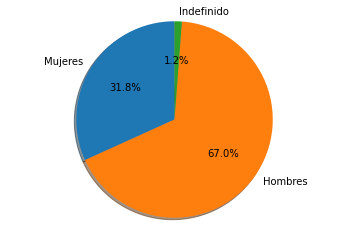

b'iVBORw0KGgoAAAANSUhEUgAAAbAAAAEgCAYAAADVKCZpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nO3dd5gV9cH+//ecur0vvSu9g6CgCIqxl/ioCYqVxEeJBuM3+suT5KtJ/JpcPtHnsaSYpjHGmmABGyIRBBWk9yJtaQvssr2cOjO/PxZWEQgguztnzrlf17XXsqfs3Ic959xnZj7zGcO2bRsRERGX8TgdQERE5OtQgYmIiCupwERExJVUYCIi4koqMBERcSUVmIiIuJIKTEREXEkFJiIirqQCExERV1KBiYiIK6nARETElVRgIiLiSiowERFxJRWYiIi4kgpMRERcSQUmIiKupAITERFXUoGJiIgrqcBERMSVVGAiIuJKKjAREXElFZiIiLiSCkxERFxJBSYiIq6kAhMREVdSgYmIiCupwERExJVUYCIi4koqMBERcSUVmEgCyMrKOqnbz5s3j8svv/y4t7v++usZMmQIjz/+OA8++CBz5sz5t7efOXMmjzzySItkFGltPqcDiEjr2LdvH59++ik7duw44ftceeWVXHnlla2YSqTlaA1MJIHMmzePCRMmcO2119KvXz8mT56MbdsAzJo1i379+nHOOefw+uuvN9+noaGBKVOmMGrUKIYPH86MGTMAuPDCCykrK2PYsGEsWLCAW2+9lenTpwPQo0cPfvaznzFixAgGDx7Mxo0bAXjuuee4++67Adi+fTtjxoxh1KhRPPDAA83Ls22b+++/n0GDBjF48GBeffXVNvm/EfkqFZhIglmxYgVPPPEE69evZ9u2bXzyySeEw2Fuv/123nrrLRYsWMC+ffuab//LX/6S888/nyVLljB37lzuv/9+GhoamDlzJqeddh

In [27]:
import matplotlib.pyplot as plt

labels = 'Mujeres', 'Hombres', 'Indefinido'
aids_country_age_get = aids_country_age['Cumulative Female'].dropna()
aids_country_age_sum = aids_country_age_get.sum()
aids_country_age2_get = aids_country_age['Cumulative Male'].dropna()
aids_country_age2_sum = aids_country_age2_get.sum()
aids_country_age3_get = aids_country_age['Cumulative Unknown'].dropna()
aids_country_age3_sum = aids_country_age3_get.sum()
sizes = [aids_country_age_sum, aids_country_age2_sum, aids_country_age3_sum ]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('comparacion-sexo-vih.png')
plt.show()

import base64

with open("comparacion-sexo-vih.png", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())

print(encoded_string)

In [28]:
aids_country= pd.read_csv('Data/vih/vih_who_clean.csv')
aids_country


,Country,Lat,Lon,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,0,0,0,0,0,0,0,...,60,114,161,214,281,364,554,847,924,1044
1,Albania,NaN,NaN,70,90,130,180,250,330,410,...,770,860,950,1000,1100,1200,1300,1300,1400,1400
2,Algeria,NaN,NaN,157,220,272,334,440,574,870,...,2221,2680,3396,4642,6020,7718,9551,11044,12759,14390
3,Angola,NaN,NaN,0,0,0,0,240,609,4065,...,22036,26556,31736,48413,63028,71541,69841,78721,88734,93310
4,Antigua and Barbuda,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,250,323,348,366,366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,Venezuela (Bolivarian Republic of),NaN,NaN,1100,2993,5223,7454,9686,11917,19582,...,39255,41226,44004,44047,44600,58303,53278,41007,28354,44912
178,Viet Nam,NaN,NaN,0,0,50,200,516,2697,8246,...,49428,61424,73711,84187,93505,111482,124410,139912,149949,159664
179,Yemen,NaN,NaN,0,0,0,0,0,0,0,...,551,625,721,901,1355,1397,1750,2102,2325,2669
180,Zambia,NaN,NaN,0,0,142,15328,29998,57165,85882,...,349076,423721,479881,559764,653701,758646,796725,852529,964148,1064321


In [30]:
cols = aids_country.keys()
confirmed = aids_country.loc[:, cols[4]:cols[-1]]
confirmed

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,0,0,0,0,0,0,0,21,60,114,161,214,281,364,554,847,924,1044
1,90,130,180,250,330,410,500,600,690,770,860,950,1000,1100,1200,1300,1300,1400,1400
2,220,272,334,440,574,870,993,1111,1526,2221,2680,3396,4642,6020,7718,9551,11044,12759,14390
3,0,0,0,240,609,4065,7034,11839,16611,22036,26556,31736,48413,63028,71541,69841,78721,88734,93310
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,250,323,348,366,366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2993,5223,7454,9686,11917,19582,22816,27866,33223,39255,41226,44004,44047,44600,58303,53278,41007,28354,44912
178,0,50,200,516,2697,8246,16212,27059,38080,49428,61424,73711,84187,93505,111482,124410,139912,149949,159664
179,0,0,0,0,0,0,68,189,292,551,625,721,901,1355,1397,1750,2102,2325,2669
180,0,142,15328,29998,57165,85882,163843,227976,285767,349076,423721,479881,559764,653701,758646,796725,852529,964148,1064321


In [78]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    #death_sum = deaths[i].sum()
    #recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    #total_deaths.append(death_sum)
    #total_recovered.append(recovered_sum)
    #total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    #mortality_rate.append(death_sum/confirmed_sum)
    #recovery_rate.append(recovered_sum/confirmed_sum)
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

window = 7

world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

world_active_avg = moving_average(total_active, window)
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
days_in_future = 5
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-5]

In [79]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[5:], world_cases[5:], test_size=0.05, shuffle=False) 

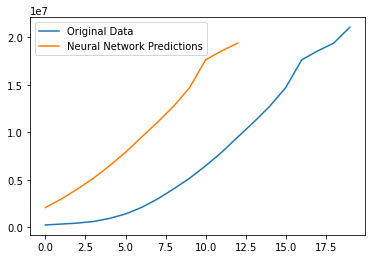

In [134]:
show_growth = [aids_country['2000'].sum() , aids_country['2001'].sum(), aids_country['2002'].sum(), aids_country['2003'].sum(), aids_country['2004'].sum(), aids_country['2005'].sum(), aids_country['2006'].sum(), aids_country['2007'].sum(), aids_country['2008'].sum(), aids_country['2009'].sum(), aids_country['2010'].sum(), aids_country['2011'].sum(), aids_country['2012'].sum(), aids_country['2013'].sum(), aids_country['2014'].sum(), aids_country['2015'].sum(), aids_country['2016'].sum(), aids_country['2017'].sum(), aids_country['2018'].sum(),aids_country['2019'].sum()]
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10000000000)
clf.fit(X_train_confirmed, y_train_confirmed.ravel())
predictneural = clf.predict(X_train_confirmed)
plt.plot(show_growth)
plt.plot(predictneural)
#plt.plot(world_cases)
plt.legend(['Original Data', 'Neural Network Predictions', 'world'])



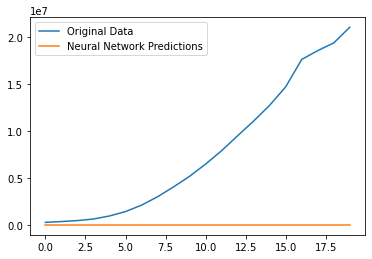

In [112]:
show_growth = [aids_country['2000'].sum() , aids_country['2001'].sum(), aids_country['2002'].sum(), aids_country['2003'].sum(), aids_country['2004'].sum(), aids_country['2005'].sum(), aids_country['2006'].sum(), aids_country['2007'].sum(), aids_country['2008'].sum(), aids_country['2009'].sum(), aids_country['2010'].sum(), aids_country['2011'].sum(), aids_country['2012'].sum(), aids_country['2013'].sum(), aids_country['2014'].sum(), aids_country['2015'].sum(), aids_country['2016'].sum(), aids_country['2017'].sum(), aids_country['2018'].sum(),aids_country['2019'].sum()]
largo = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
show_growth = np.array(show_growth).reshape(-1, 1)
largo = np.array(largo).reshape(-1, 1)
from sklearn.neural_network import MLPClassifier
import numpy as np
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
clf.fit(show_growth, largo.ravel())
predictneural = clf.predict(largo)
plt.plot(show_growth)
plt.plot(predictneural)
plt.legend(['Original Data', 'Neural Network Predictions'])

In [150]:
show_growth = [['2000-01-01',aids_country['2000'].sum()], ['2001-01-01',aids_country['2001'].sum()], ['2002-01-01',aids_country['2002'].sum()], ['2003-01-01',aids_country['2003'].sum()], ['2004-01-01',aids_country['2004'].sum()], ['2005-01-01',aids_country['2005'].sum()], ['2006-01-01',aids_country['2006'].sum()],['2007-01-01', aids_country['2007'].sum()],['2008-01-01',aids_country['2008'].sum()], ['2009-01-01',aids_country['2009'].sum()],['2010-01-01', aids_country['2010'].sum()], ['2011-01-01',aids_country['2011'].sum()],['2012-01-01', aids_country['2012'].sum()], ['2013-01-01',aids_country['2013'].sum()],['2014-01-01', aids_country['2014'].sum()],['2015-01-01', aids_country['2015'].sum()], ['2016-01-01',aids_country['2016'].sum()],['2017-01-01',aids_country['2017'].sum()],['2018-01-01',aids_country['2018'].sum()],['2019-01-01',aids_country['2019'].sum()]]
show_growth

[['2000-01-01', 270321],
 ['2001-01-01', 359607],
 ['2002-01-01', 463219],
 ['2003-01-01', 629608],
 ['2004-01-01', 952716],
 ['2005-01-01', 1422179],
 ['2006-01-01', 2105204],
 ['2007-01-01', 2999794],
 ['2008-01-01', 4052003],
 ['2009-01-01', 5180328],
 ['2010-01-01', 6482332],
 ['2011-01-01', 7908005],
 ['2012-01-01', 9500377],
 ['2013-01-01', 11069713],
 ['2014-01-01', 12746605],
 ['2015-01-01', 14709727],
 ['2016-01-01', 17631648],
 ['2017-01-01', 18569490],
 ['2018-01-01', 19389335],
 ['2019-01-01', 21059285]]

In [198]:
df = pd.DataFrame(show_growth, columns = ["Date", "Casos"])
df.index.to_series().head()
df
#from statsmodels.tsa.seasonal import seasonal_decompose
#result = seasonal_decompose(df['Count'],model ='multiplicative') 

,Date,Casos
0,2000-01-01,270321
1,2001-01-01,359607
2,2002-01-01,463219
3,2003-01-01,629608
4,2004-01-01,952716
5,2005-01-01,1422179
6,2006-01-01,2105204
7,2007-01-01,2999794
8,2008-01-01,4052003
9,2009-01-01,5180328


In [199]:
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(df['Casos'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=245.601, Time=0.26 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=266.108, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=243.673, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=293.507, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=243.196, Time=0.02 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=243.943, Time=0.23 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=245.644, Time=0.18 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=247.862, Time=0.05 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,0)(0,1,0)[12]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,1,0)[12] intercept
Total fit time: 1.692 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   20
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -118.598
Date:                            Mon, 09 Nov 2020   AIC                            243.196
Time:                                    04:51:44   BIC                            243.434
Sample:                                         0   HQIC                           241.588
                                             - 20                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.454e+06    1.2e-09   2.89e+15      0.000    3.45e+06    3.45e+06
ar.L1          0.8377      0.016     52.166      0.000       0.806       0.869
sigma2      3.931e+11   1.12e-15   3.52e+26      0.000    3.93e+11    3.93e+11
===================================================================================
Ljung-Box (Q):                        4.87   Jarque-Bera (JB):                 1.75
Prob(Q):                              0.68   Prob(JB):                         0.42
Heteroskedasticity (H):               0.39   Skew:                             1.12
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [200]:
train = df.iloc[:len(df)-12] 
test = df.iloc[len(df)-12:] # set one year(12 months) for testing 
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['Casos'],  
                order = (1, 0, 0),  
                seasonal_order =(0, 1, 0, 12)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Casos   No. Observations:                    8
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                   0.000
Date:                            Mon, 09 Nov 2020   AIC                              4.000
Time:                                    04:51:44   BIC                                nan
Sample:                                         0   HQIC                               nan
                                              - 8                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.000       1.000       1.000
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

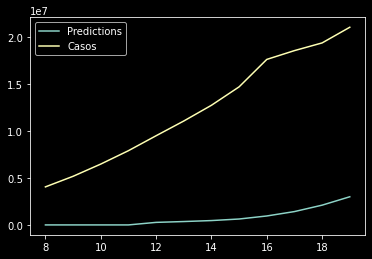

In [201]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['Casos'].plot(legend = True)

In [202]:
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
print("rmse", rmse(test["Casos"], predictions)) 
  
# Calculate mean squared error 
print("mean_squared", mean_squared_error(test["Casos"], predictions))

rmse 12562997.159339799
mean_squared 157828897625579.84


Text(0, 0.5, 'Cantidad de Personas utilizando antiretroviral')

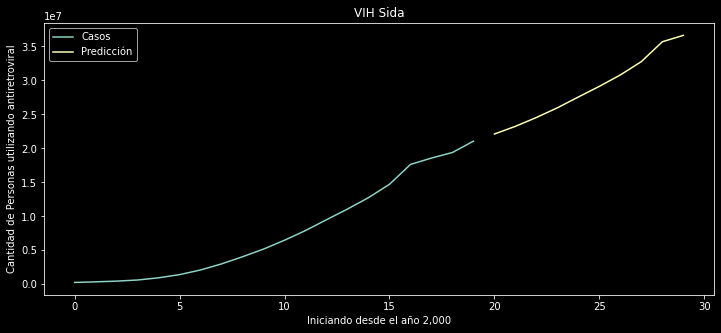

In [207]:
model = model = SARIMAX(df['Casos'],  
                        order = (1, 0, 0),  
                        seasonal_order =(0, 1, 0, 12)) 
result = model.fit() 
  
# Forecast for the next 3 years 
forecast = result.predict(start = len(df),  
                          end = (len(df)-1) + 10,  
                          typ = 'levels').rename('Predicción') 
  
# Plot the forecast values 
df['Casos'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 
plt.title('VIH Sida')
plt.xlabel('Iniciando desde el año 2,000')
plt.ylabel('Cantidad de Personas utilizando antiretroviral')

#print("rmse", rmse(df["Count"], forecast)) 
  
# Calculate mean squared error 
#print("mean_squared", mean_squared_error(df["Count"], forecast))

Text(0, 0.5, 'Cantidad de Personas utilizando antiretroviral')

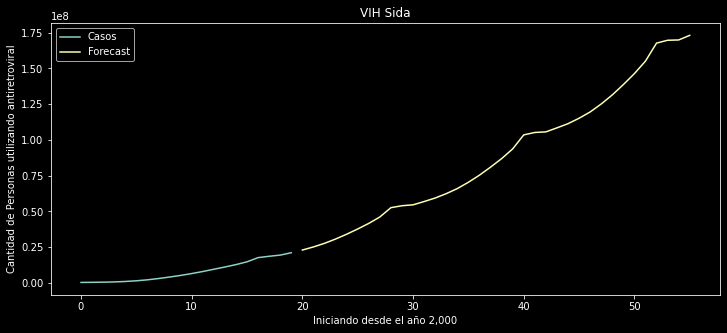

In [204]:
model = model = SARIMAX(df['Casos'],  
                        order = (0, 1, 1),  
                        seasonal_order =(2, 1, 1, 12)) 
result = model.fit() 
  
# Forecast for the next 3 years 
forecast = result.predict(start = len(df),  
                          end = (len(df)-1) + 3 * 12,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
df['Casos'].plot(figsize = (12, 5), legend = True) 
#plt.style.use(['dark_background'])
#plot.rcParams['axes.facecolor'] = 'black'
forecast.plot(legend = True) 
plt.title('VIH Sida')
plt.xlabel('Iniciando desde el año 2,000')
plt.ylabel('Cantidad de Personas utilizando antiretroviral')

In [205]:
train

,Date,Casos
0,2000-01-01,270321
1,2001-01-01,359607
2,2002-01-01,463219
3,2003-01-01,629608
4,2004-01-01,952716
5,2005-01-01,1422179
6,2006-01-01,2105204
7,2007-01-01,2999794


In [206]:
test

,Date,Casos
8,2008-01-01,4052003
9,2009-01-01,5180328
10,2010-01-01,6482332
11,2011-01-01,7908005
12,2012-01-01,9500377
13,2013-01-01,11069713
14,2014-01-01,12746605
15,2015-01-01,14709727
16,2016-01-01,17631648
17,2017-01-01,18569490
